# Import the data from the CSV file

In [24]:
import pandas as pd

data = pd.read_csv('dormdata.csv')

data

,Dorm,URM,LGB,lessthaneightyk,fouryrgrad,sixyrgrad
0,Next,20.5,11.0,23.2,86.4,94.3
1,Baker,16.0,4.2,20.6,87.8,95.7
2,Burton,20.8,10.2,18.6,86.3,94.0
3,EC,19.2,38.0,24.9,75.3,89.4
4,MacGregor,27.2,8.3,28.2,80.9,92.2
5,Maseeh,21.4,6.4,23.3,87.2,NaN
6,McCormick,20.2,8.1,27.9,88.8,95.8
7,New,43.5,16.1,31.4,80.5,91.3
8,Random,17.2,40.8,35.5,75.3,89.4
9,Senior,36.7,40.0,30.9,59.7,78.1


# Plot the data

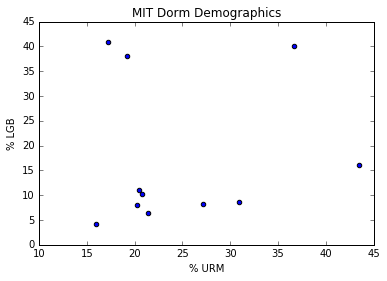

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data.URM, data.LGB)
plt.ylabel('% LGB')
plt.xlabel('% URM')
plt.title('MIT Dorm Demographics')

# Run a multiple regression

In [28]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='fouryrgrad ~ URM + LGB', data=data).fit()

lm.params

ValueError: For numerical factors, num_columns must be an int